## 투영

'/mnt/data/vector_projection_animation.gif'

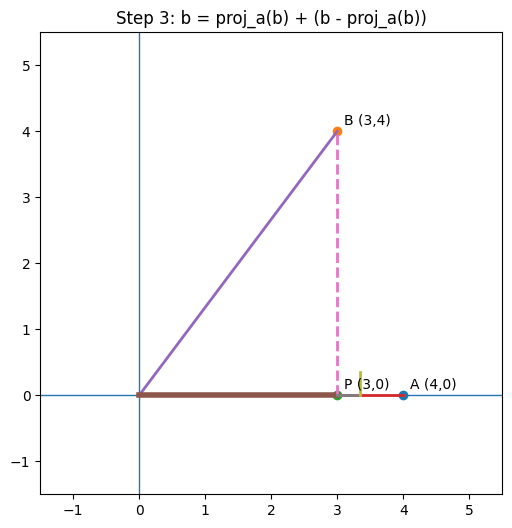

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Vectors
a = np.array([4.0, 0.0])
b = np.array([3.0, 4.0])

# Projection of b onto a (here it's onto x-axis direction)
proj = np.array([b[0], 0.0])  # (3,0)
perp = b - proj              # (0,4)

# Figure setup
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal', adjustable='box')

# Limits with padding
pad = 1.5
xmin = min(0, b[0], a[0], proj[0]) - pad
xmax = max(0, b[0], a[0], proj[0]) + pad
ymin = min(0, b[1], a[1], proj[1]) - pad
ymax = max(0, b[1], a[1], proj[1]) + pad
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Axes lines
ax.axhline(0, linewidth=1)
ax.axvline(0, linewidth=1)

# Static points/labels
ax.plot([a[0]], [a[1]], marker='o')
ax.text(a[0] + 0.1, a[1] + 0.1, "A (4,0)")
ax.plot([b[0]], [b[1]], marker='o')
ax.text(b[0] + 0.1, b[1] + 0.1, "B (3,4)")
ax.plot([proj[0]], [proj[1]], marker='o')
ax.text(proj[0] + 0.1, proj[1] + 0.1, "P (3,0)")

# Animated artists (initialized empty)
# Vector a (static arrow line)
a_line, = ax.plot([], [], linewidth=2)
# Vector b (static arrow line)
b_line, = ax.plot([], [], linewidth=2)

# Projection vector (grows)
proj_line, = ax.plot([], [], linewidth=4)
# Perpendicular drop (appears)
drop_line, = ax.plot([], [], linewidth=2, linestyle='--')

# "Right angle" marker near P (appears late)
ra1, = ax.plot([], [], linewidth=2)
ra2, = ax.plot([], [], linewidth=2)

# Title text updates
title = ax.set_title("Projection of b onto a (x-axis)")

# Helper to draw right-angle marker at P between x-axis and vertical line
def right_angle_marker(P, size=0.35):
    # small L-shape with corner at P
    x, y = P
    # along x-axis to the right
    seg1 = np.array([[x, y], [x + size, y]])
    # up from that point
    seg2 = np.array([[x + size, y], [x + size, y + size]])
    return seg1, seg2

seg1, seg2 = right_angle_marker(proj)

# Frames: 0-40 grow projection, 41-70 draw drop, 71-90 emphasize decomposition
n_frames = 95

def init():
    a_line.set_data([0, a[0]], [0, a[1]])
    b_line.set_data([0, b[0]], [0, b[1]])
    proj_line.set_data([], [])
    drop_line.set_data([], [])
    ra1.set_data([], [])
    ra2.set_data([], [])
    return a_line, b_line, proj_line, drop_line, ra1, ra2, title

def update(i):
    # Phase 1: grow projection along x-axis (0 -> P)
    if i <= 40:
        t = i / 40.0
        x = proj[0] * t
        proj_line.set_data([0, x], [0, 0])
        drop_line.set_data([], [])
        ra1.set_data([], [])
        ra2.set_data([], [])
        title.set_text("Step 1: Grow proj_a(b) along a-direction")
    # Phase 2: drop perpendicular from B to P
    elif i <= 70:
        t = (i - 40) / 30.0
        proj_line.set_data([0, proj[0]], [0, 0])
        y = b[1] * t
        drop_line.set_data([b[0], b[0]], [b[1], b[1] - y])
        # show right angle marker near end
        if i >= 62:
            ra1.set_data(seg1[:, 0], seg1[:, 1])
            ra2.set_data(seg2[:, 0], seg2[:, 1])
        else:
            ra1.set_data([], [])
            ra2.set_data([], [])
        title.set_text("Step 2: Drop a perpendicular from B to the x-axis")
    # Phase 3: show decomposition (projection + perpendicular component)
    else:
        t = (i - 70) / 24.0
        proj_line.set_data([0, proj[0]], [0, 0])
        drop_line.set_data([proj[0], proj[0]], [0, perp[1] * t])
        ra1.set_data(seg1[:, 0], seg1[:, 1])
        ra2.set_data(seg2[:, 0], seg2[:, 1])
        title.set_text("Step 3: b = proj_a(b) + (b - proj_a(b))")
    return a_line, b_line, proj_line, drop_line, ra1, ra2, title

anim = FuncAnimation(fig, update, frames=n_frames, init_func=init, blit=True, interval=40)

# Save as GIF
out_path = "/mnt/data/vector_projection_animation.gif"
writer = PillowWriter(fps=25)
anim.save(out_path, writer=writer)

out_path



'/mnt/data/b_projects_onto_a.gif'

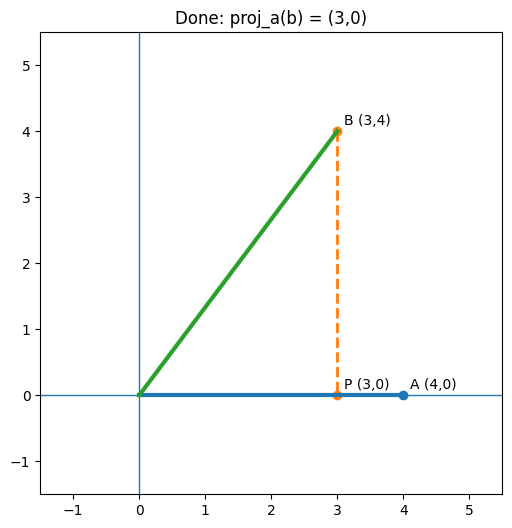

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML, display

# Given vectors
a = np.array([4.0, 0.0])
b0 = np.array([3.0, 4.0])

# Projection of b onto a (a is x-axis direction)
P = np.array([b0[0], 0.0])

# --- Plot setup ---
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal', adjustable='box')

pad = 1.5
ax.set_xlim(-1.5, max(a[0], b0[0]) + pad)
ax.set_ylim(-1.5, b0[1] + pad)

# Axes
ax.axhline(0, linewidth=1)
ax.axvline(0, linewidth=1)

# Static: a vector
ax.plot([0, a[0]], [0, a[1]], linewidth=3)
ax.scatter([a[0]], [a[1]])
ax.text(a[0] + 0.1, a[1] + 0.1, "A (4,0)")

# Static points for reference
ax.scatter([b0[0], P[0]], [b0[1], P[1]])
ax.text(b0[0] + 0.1, b0[1] + 0.1, "B (3,4)")
ax.text(P[0] + 0.1, P[1] + 0.1, "P (3,0)")

# Guide line (perpendicular drop)
ax.plot([b0[0], b0[0]], [b0[1], 0], linestyle='--', linewidth=2)

# Animated artists
b_line, = ax.plot([], [], linewidth=3)       # moving b
proj_line, = ax.plot([], [], linewidth=4)    # show projection at end
title = ax.set_title("b slides down to its projection on a")

n_frames = 80

def init():
    b_line.set_data([0, b0[0]], [0, b0[1]])
    proj_line.set_data([], [])
    return b_line, proj_line, title

def update(i):
    t = i / (n_frames - 1)
    tip = (1 - t) * b0 + t * P  # vertical slide from B to P

    b_line.set_data([0, tip[0]], [0, tip[1]])

    if t > 0.85:
        proj_line.set_data([0, P[0]], [0, P[1]])
        title.set_text("Done: proj_a(b) = (3,0)")
    else:
        proj_line.set_data([], [])
        title.set_text("Animating: b tip slides down to x-axis (a-direction)")

    return b_line, proj_line, title

# NOTE: blit=False is more reliable across backends (fixes "not animating" for many users)
anim = FuncAnimation(fig, update, frames=n_frames, init_func=init, blit=False, interval=40)

# Save as GIF (works in scripts too)
out_gif = "/mnt/data/b_projects_onto_a.gif"
anim.save(out_gif, writer=PillowWriter(fps=25))

# Display animation inline (for Jupyter/Colab)
display(HTML(anim.to_jshtml()))

out_gif

